In [1]:
from glob import glob
import yaml

params = glob("../data/dataset1/results/wotan_tls/*.yaml")

In [2]:
len(params)

9

In [3]:
seeds = [p.split("/")[-1].split(".")[0] for p in params]

In [4]:
import numpy as np

def right_candidate(t0, period, true_t0, true_period, verbose=False):
    t0_check = np.abs((t0  - true_t0 + 0.5 * true_period) % true_period - 0.5 * true_period)%period < 0.01
    period_check = np.abs(period - true_period) < 0.1
    same = np.logical_and(t0_check, period_check)
    if verbose:
        if not same:
            if not t0_check:
                output = f"t0 differ: {t0:.2e} {true_t0:.2e}"
            if not period_check:
                output = f"period differ: {period:.2e} {true_period:.2e}"
        else:
            output = "match"
        return same, output
    else:
        return same

In [6]:
wtls_detected = []
relative_duration = []
relative_depth = []

for seed in seeds:
    params = yaml.full_load(open(f"../data/dataset1/params/{seed}.yaml", "r"))
    result = yaml.full_load(open(f"../data/dataset1/results/wotan_tls/{seed}.yaml", "r"))
    wtls_detected.append(right_candidate(params['t0'], params['period'], result['t0'], result['period']))
    relative_depth.append(params['relative_depth'])
    relative_duration.append(params['relative_duration'])
    
amp = np.array(relative_depth)
var = np.array(relative_duration)

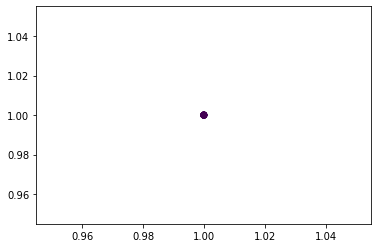

In [7]:
import matplotlib.pyplot as plt

plt.scatter(relative_duration, relative_depth, c=wtls_detected)

In [10]:
params

{'depth': 0.01,
 'duration': 0.04,
 'error': 0.001,
 'omega': 78.53981633974483,
 'period': 1.1,
 'quality': 64.7272177931374,
 'relative_depth': 1,
 'relative_duration': 1,
 'seed': 4,
 'sigma': 0.0025,
 't0': 0.2}

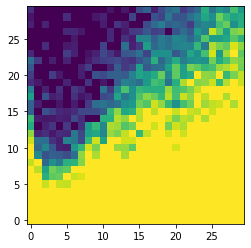

In [69]:
bins = (30,30)
from scipy.stats import binned_statistic_2d
plt.imshow(binned_statistic_2d(var, amp, wtls_detected, bins=bins).statistic.T, origin="lower")

In [70]:
# -----------------------------------------------

In [71]:
from glob import glob
import yaml

params = glob("../data/results/nuance/*.yaml")

In [72]:
len(params)

10707

In [73]:
seeds = [p.split("/")[-1].split(".")[0] for p in params]

In [74]:
import numpy as np

def right_candidate(t0, period, true_t0, true_period, verbose=False):
    t0_check = np.abs((t0  - true_t0 + 0.5 * true_period) % true_period - 0.5 * true_period)%period < 0.01
    period_check = np.abs(period - true_period) < 0.1
    same = np.logical_and(t0_check, period_check)
    if verbose:
        if not same:
            if not t0_check:
                output = f"t0 differ: {t0:.2e} {true_t0:.2e}"
            if not period_check:
                output = f"period differ: {period:.2e} {true_period:.2e}"
        else:
            output = "match"
        return same, output
    else:
        return same

In [75]:
nuance_detected = []
relative_duration = []
relative_depth = []

for seed in seeds:
    params = yaml.full_load(open(f"../data/params/{seed}.yaml", "r"))
    result = yaml.full_load(open(f"../data/results/nuance/{seed}.yaml", "r"))
    nuance_detected.append(right_candidate(params['t0'], params['period'], result['t0'], result['period']))
    relative_depth.append(params['relative_depth'])
    relative_duration.append(params['relative_duration'])
    
amp = np.array(relative_depth)
var = np.array(relative_duration)

In [76]:
nuance_detected = np.array(nuance_detected)
wtls_detected = np.array(wtls_detected)

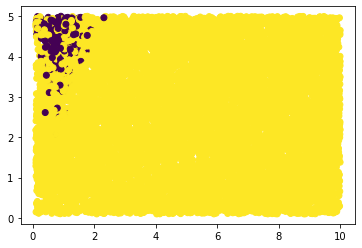

In [77]:
import matplotlib.pyplot as plt

plt.scatter(relative_duration, relative_depth, c=nuance_detected)

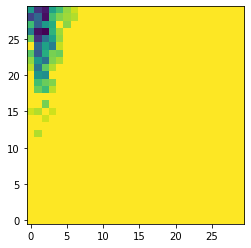

In [79]:
from scipy.stats import binned_statistic_2d
plt.imshow(binned_statistic_2d(var, amp, nuance_detected, bins=bins).statistic.T, origin="lower")

In [39]:
nuance_detected & wtls_detected

ValueError: operands could not be broadcast together with shapes (9705,) (9641,) 